In [1]:
import os
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Datasets

In [2]:
def loadCSV(filename):
    file = filename
    if '.csv' not in filename:
        file += '.csv'
    data = pd.read_csv(file, encoding = 'ISO-8859-1')
    return data

In [3]:
d1 = loadCSV('tweetset_1')
d2 = loadCSV('tweetset_2')

In [4]:
p1 = loadCSV('processed_1')
p2 = loadCSV('processed_2')

# Standardize Tweetset

In [5]:
d1 = d1.rename(columns = {'does_this_tweet_contain_hate_speech':'class',
                          'tweet_text':'tweet'})
    
originalClass = ['The tweet is not offensive',
                 'The tweet uses offensive language but not hate speech',
                 'The tweet contains hate speech']
newClass = [0, 1, 2]

d1['class'] = d1['class'].replace(originalClass, newClass)

In [6]:
originalClass = [0, 1, 2]
newClass = [2, 1, 0]
d2['class'] = d2['class'].replace(originalClass, newClass)

# Calculate Frequencies of Unique Words

In [7]:
raw_flist = ['rt', 'a', 'to', 'that', 'i', 'like', 'you', 'in', 'is', 'my', 'the', 
             'and', 'your', 'it', 'with', 'of', 'are', 'for', 'me', 'this', 'but']
stem_flist = ['[@]', '[link]']
def removeWords(dictionary, filter_list):
    for w in filter_list:
        if w in dictionary.keys():
            del dictionary[w]

In [8]:
def iterateFrequency(dictionary, word):
    if dictionary.get(word, False):
        dictionary[word] += 1
    else:
        dictionary[word] = 1

In [9]:
def rawFrequencies(data):
    all_words = {}
    neutral = {}
    offensive = {}
    hate = {}
    
    for index, row in data.iterrows():
        tweet = row['tweet']
        category = row['class']
        
        words = tweet.split()
        
        for w in words:
            iterateFrequency(all_words, w.lower())
            if category == 0:
                iterateFrequency(neutral, w.lower())
            elif category == 1:
                iterateFrequency(offensive, w.lower())
            elif category == 2:
                iterateFrequency(hate, w.lower())
        
    removeWords(all_words, raw_flist)
    removeWords(neutral, raw_flist)
    removeWords(offensive, raw_flist)
    removeWords(hate, raw_flist)
        
    return all_words, neutral, offensive, hate

In [10]:
def stemFrequencies(data):
    all_words = {}
    neutral = {}
    other = {}
    
    for index, row in data.iterrows():
        tweet = row['tweet']
        category = row['class']
        
        words = tweet.split()
        
        for w in words:
            iterateFrequency(all_words, w.lower())
            if category == 0:
                iterateFrequency(neutral, w.lower())
            elif category == 1:
                iterateFrequency(other, w.lower())
    
    removeWords(all_words, stem_flist)
    removeWords(neutral, stem_flist)
    removeWords(other, stem_flist)
    
    return all_words, neutral, other

In [11]:
def dispWordFreq(dictionary):
    unique_words = sorted( ((v,k) for k, v in dictionary.items()), reverse = True)
    for v, k in unique_words:
        word_val = "%s: %d" % (k, v)
        print(word_val)

# Word Cloud Function

In [12]:
def generateWordCloud(dictionary, title):
    wordcloud = WordCloud(background_color='white', width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dictionary)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [13]:
def createWordClouds(data, num, raw = False):    
    if raw:
        all_words, neutral, offensive, hate = rawFrequencies(data)
        generateWordCloud(all_words, 'Raw Twitter Dataset #%s - All Classes' % num)
        generateWordCloud(neutral, 'Raw Twitter Dataset #%s - Neutral Class' % num)
        generateWordCloud(offensive, 'Raw Twitter Dataset #%s - Offensive Class' % num)
        generateWordCloud(hate, 'Raw Twitter Dataset #%s - Hate Class' % num)
    else:
        all_words, neutral, other = stemFrequencies(data)
        generateWordCloud(all_words, 'Stemmed Twitter Dataset #%s - All Classes' % num)
        generateWordCloud(neutral, 'Stemmed Twitter Dataset #%s - Neutral Class' % num)
        generateWordCloud(other, 'Stemmed Twitter Dataset #%s - Hate/Offensive Class' % num)

# Generating Word Clouds for  Raw Twitter Dataset #1

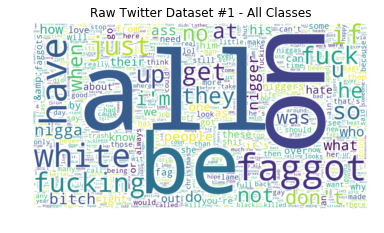

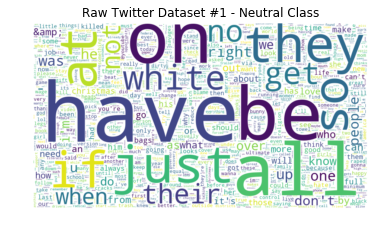

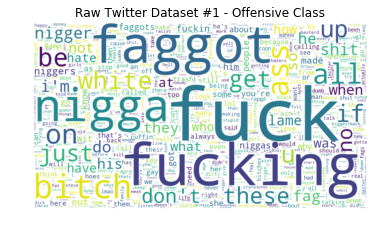

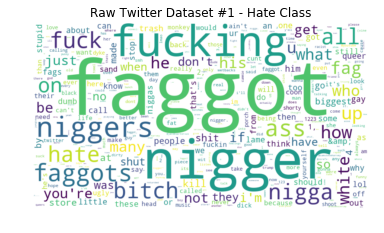

In [14]:
createWordClouds(d1, num = 1, raw = True)

# Generating Word Clouds for Raw Twitter Dataset #2

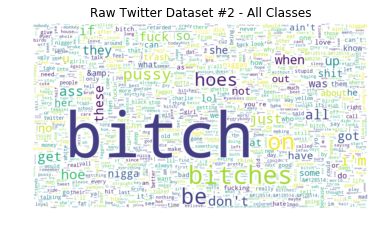

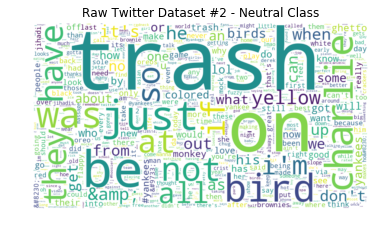

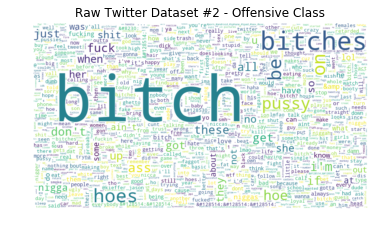

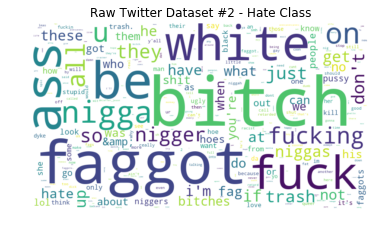

In [15]:
createWordClouds(d2, num = 2, raw = True)

# Generating Word Clouds for Stemmed Twitter Dataset #1

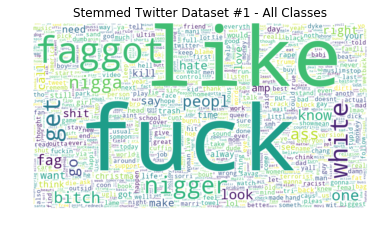

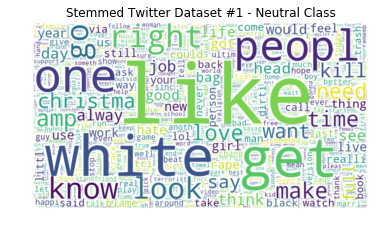

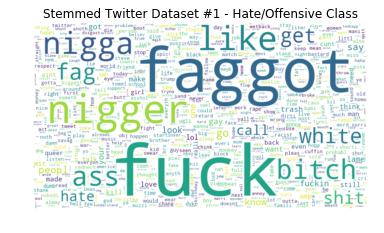

In [16]:
createWordClouds(p1, num = 1)

# Generating Word Clouds for Stemmed Twitter Dataset #2

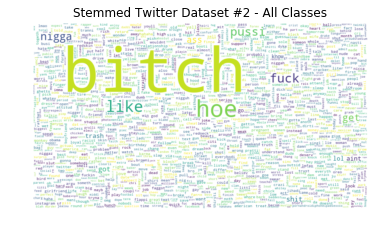

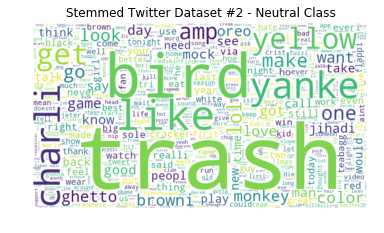

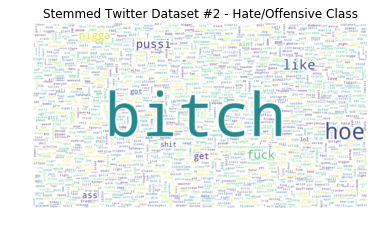

In [17]:
createWordClouds(p2, num = 2)